

# Project: Investigate a Dataset (No-show appointments)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

> This project about No-show appointments.The dataset contiens information from medical appointment in Braizl and 
foucused on whether patient show up or not for appointment. Each row of data contiens number of characteristics about the patient.<br>
>1.PatientId: indicates the patient ID; duplication is possible due to cases where the same patient booked more than one appointment.<br>
>2.AppointmentID: indicates appoint ID, this field should be unique<br>
>3.Gender: indicates the patient's gender (M/F)<br>
>4.ScheduledDay: indicates the Date/Time the patient set up their appointment.<br>
>5.AppointmentDay: indicates the date/time the patient called to book their appointment.<br>
>6.Age: indicates the patient's age.<br>
>7.Neighborhood: indicates the location of the hospital.<br>
>8.Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>
>9.Hipertension: indicates whether or not the patient is experiencing Hypertension.<br>
>10.Diabetes: indicates whether or not the patient is experiencing Diabetes.<br>
>11.Alcoholism: indicates whether or not the patient is experiencing Alcoholism.<br>
>12.Handcap: indicates whether or not the patient is with special needs.<br>
>13.SMS_received: indicates whether or not the patient has received a reminder text message.<br>
>14.Show-up: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.<br>

In [112]:
# Use this cell to set up import statements for all of the packages that you

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [113]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [114]:
df.shape

(110527, 14)

In [115]:
#cheak for duplicated
df.duplicated().sum()

0

In [116]:
df['PatientId'].nunique()

62299

In [117]:
#cheake number of duplicated PatientId
df['PatientId'].duplicated().sum()

48228

In [118]:
#cheake number of duplicated PatientId and non show
df.duplicated(['PatientId','No-show']).sum()

38710

In [119]:
# checking for null values from each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [121]:
#Describe statistics information
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Incorrect Data Validation 

In [15]:
#cheak age with -1 value
df[df.Age < 0]['Age']

99832   -1
Name: Age, dtype: int64

#### Summary

1.The data contains 110527 rows and 14 columns

2.There are no null values

3.PatientId is expected to be an integer rather than a float

4.Age has a minimum value of -1, which is inaccurate because age cannot be negative

5.Some column labels are not spelt correctly



### Data Cleaning (Replace this with more specific notes!)

In [122]:
#Rename columns

df.rename(columns={'No-show':'Status'},inplace=True)
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'Handcap':'Handicap'},inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [138]:
df['Scholarship']=df['Scholarship'].replace({0:'NoScholarship',1:'Scholarship'})
df['Hypertension']=df['Hypertension'].replace({0:'NoHypertension',1:'Hypertension'})
df['Diabetes']=df['Diabetes'].replace({0:'NoDiabetes',1:'Diabetes'})
df['Alcoholism']=df['Alcoholism'].replace({0:'NoAlcoholism',1:'Alcoholism'})
df['Handicap']=df['Handicap'].replace({0:'NoHandicap',1:'Handicap L1',2:'Handicap L2',3:'Handicap L3',4:'Handicap L4'})
df['SMS_received']=df['SMS_received'].replace({0:'no SMS_received',1:'SMS_received'})
df['Status']=df['Status'].replace({'No':'Show','Yes':'Noshow'})


In [124]:
df.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,NoScholarship,Hypertension,NoDiabetes,NoAlcoholism,NoHandicap,no SMS_received,Show
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,NoScholarship,NoHypertension,NoDiabetes,NoAlcoholism,NoHandicap,no SMS_received,Show
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,NoScholarship,NoHypertension,NoDiabetes,NoAlcoholism,NoHandicap,no SMS_received,Show
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,NoScholarship,NoHypertension,NoDiabetes,NoAlcoholism,NoHandicap,no SMS_received,Show
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,NoScholarship,Hypertension,Diabetes,NoAlcoholism,NoHandicap,no SMS_received,Show
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,NoScholarship,Hypertension,NoDiabetes,NoAlcoholism,NoHandicap,no SMS_received,Show


In [125]:
df['Gender']=df['Gender'].replace({'F':'Female','M':'Male'})
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status
0,2.987250e+13,5642903,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,NoScholarship,Hypertension,NoDiabetes,NoAlcoholism,NoHandicap,no SMS_received,Show
1,5.589978e+14,5642503,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,NoScholarship,NoHypertension,NoDiabetes,NoAlcoholism,NoHandicap,no SMS_received,Show
2,4.262962e+12,5642549,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,NoScholarship,NoHypertension,NoDiabetes,NoAlcoholism,NoHandicap,no SMS_received,Show
3,8.679512e+11,5642828,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,NoScholarship,NoHypertension,NoDiabetes,NoAlcoholism,NoHandicap,no SMS_received,Show
4,8.841186e+12,5642494,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,NoScholarship,Hypertension,Diabetes,NoAlcoholism,NoHandicap,no SMS_received,Show


In [126]:
#convert datatype for PatientId 
df['PatientId'] = df['PatientId'].astype('int64')
df['PatientId'].dtype

dtype('int64')

In [127]:
np.sort(df['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [128]:
# Define a new column to include the Age Groups

AgeGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
df['AgeGroup'] = pd.cut(df.Age, range(0, 121, 20), right=False, labels=AgeGroupLabels)
df['AgeGroup'] = df.AgeGroup.astype('category')
df.AgeGroup.cat.categories

Index(['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119'], dtype='object')

In [129]:
#drop Age -1 vaule
df.drop([99832], axis = 0, inplace = True)

In [130]:
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status,AgeGroup


In [134]:
#remov duplicated data
df.drop_duplicates(['PatientId','Status'],inplace=True)
df.shape

(71816, 15)

In [136]:
#remove unused columns
df.drop(['AppointmentID', 'AppointmentDay', 'ScheduledDay', 'Neighbourhood'], axis = 1, inplace = True)
df.head(1)


,PatientId,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status,AgeGroup
0,29872499824296,Female,62,NoScholarship,Hypertension,NoDiabetes,NoAlcoholism,NoHandicap,no SMS_received,Show,60 - 79


<a id='eda'></a>
## Exploratory Data Analysis


In [131]:
# Create a funtion to generate a bar plot the frequency table 
# generated by the Show_NoShow_by_Group function.

def Show_No_Show_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticks(ax.get_yticks().tolist())
    ax.set_yticklabels(['{:1.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [132]:
# Create a funtion to calculate the plot the group proportions based on one variable by number of appointments

def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

### Research Question1(What is the overall appointment show-up vs. no show-up rate?)

Status
Show      75.41
Noshow    24.59
Name: count, dtype: float64

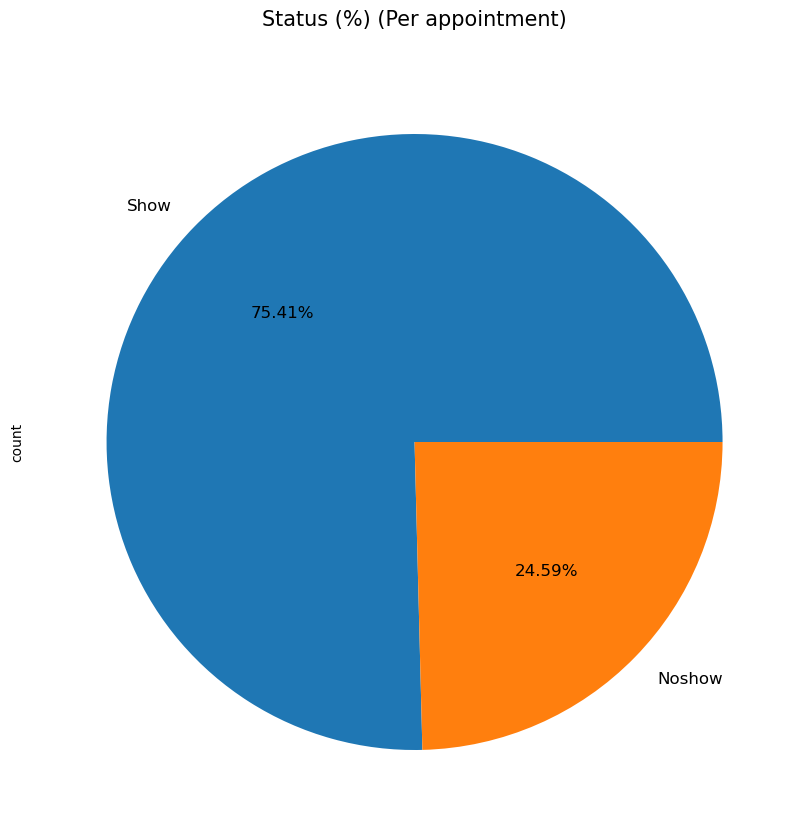

In [135]:
PropByVar(df, 'Status')

In dashboard above ,we find appointment rate how show up are 75.41% and how dont show up 24.59% (per appointment)

### Research Question 2 (What is the attendance rate for appointments for each category?)

#### 1.Age 

AgeGroup
0 - 19       28.87
40 - 59      26.24
20 - 39      25.79
60 - 79      16.02
80 - 99       3.07
100 - 119     0.01
Name: count, dtype: float64

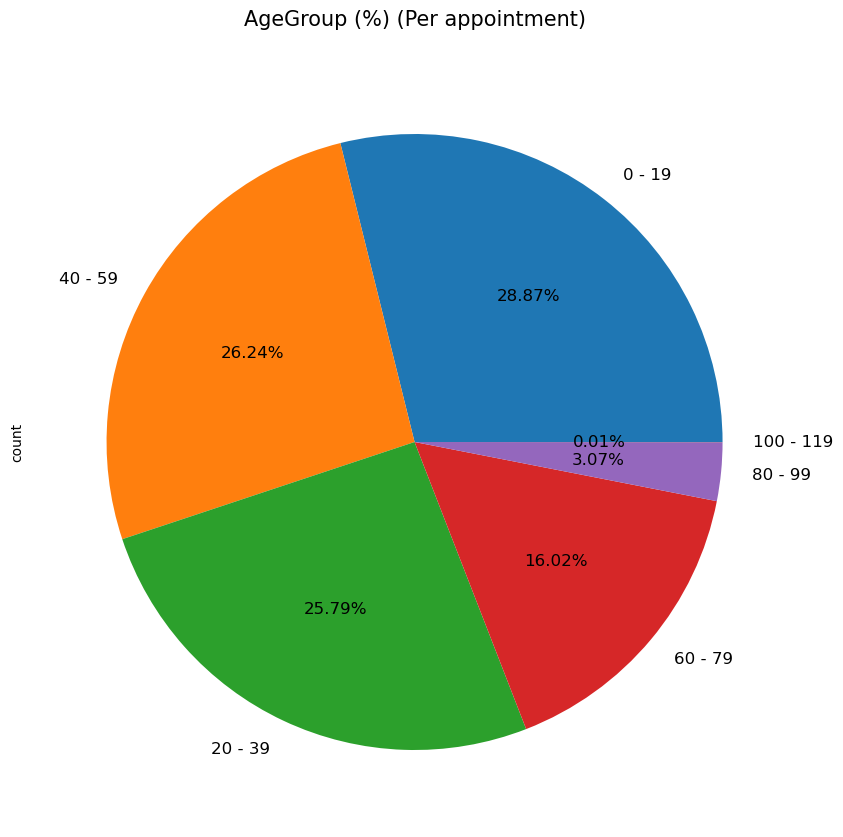

In [31]:
PropByVar(df, 'AgeGroup')

looking to the chart above,there are six age group of patient per appointment. We find that appointment rate where patient are from age group (0-19) is the largest with 28.87%.On the other hand the lowest age group are from (100-119) per appointment.

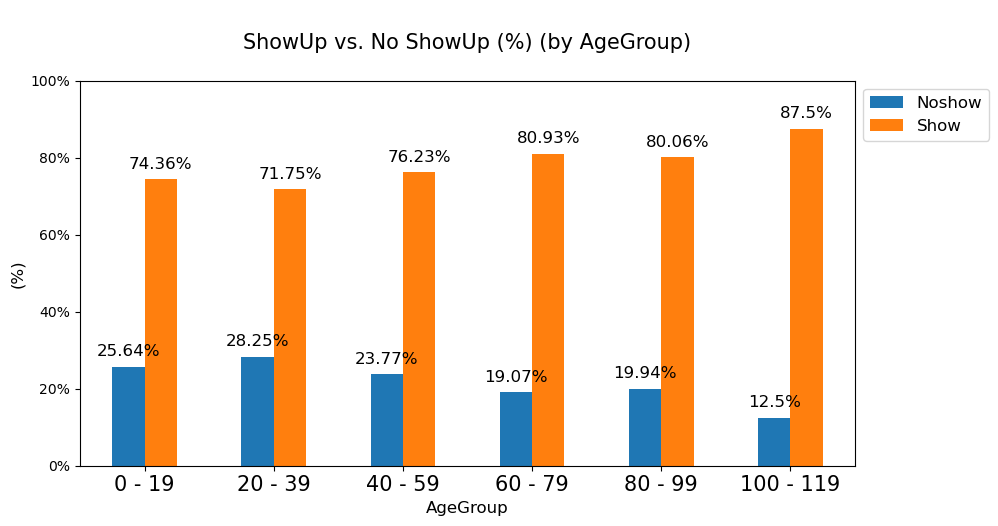

In [46]:
df_AgeGroup = Show_No_Show_bar_plot(df,'AgeGroup')

In [44]:
AgeGroup = pd.crosstab(index=df['AgeGroup'],
            columns=df['Status'])
AgeGroup 

Status,Noshow,Show
AgeGroup,,
0 - 19,5317,15419
20 - 39,5233,13289
40 - 59,4479,14363
60 - 79,2194,9312
80 - 99,439,1763
100 - 119,1,7


*Based on diagram and information above :
>1.The AgeGroup from (0-19) have largest number of patients per appointment  and the AgeGroup from (100-119) have smallest number of patients patinent per appointment.
>2.The show-up rate agegroup from (100-119) is highest with in 87.5% and the lowest show-up rate of agegroup is (20-39) within 71.75%. 

2.Gender

Gender
Female    64.7
Male      35.3
Name: count, dtype: float64

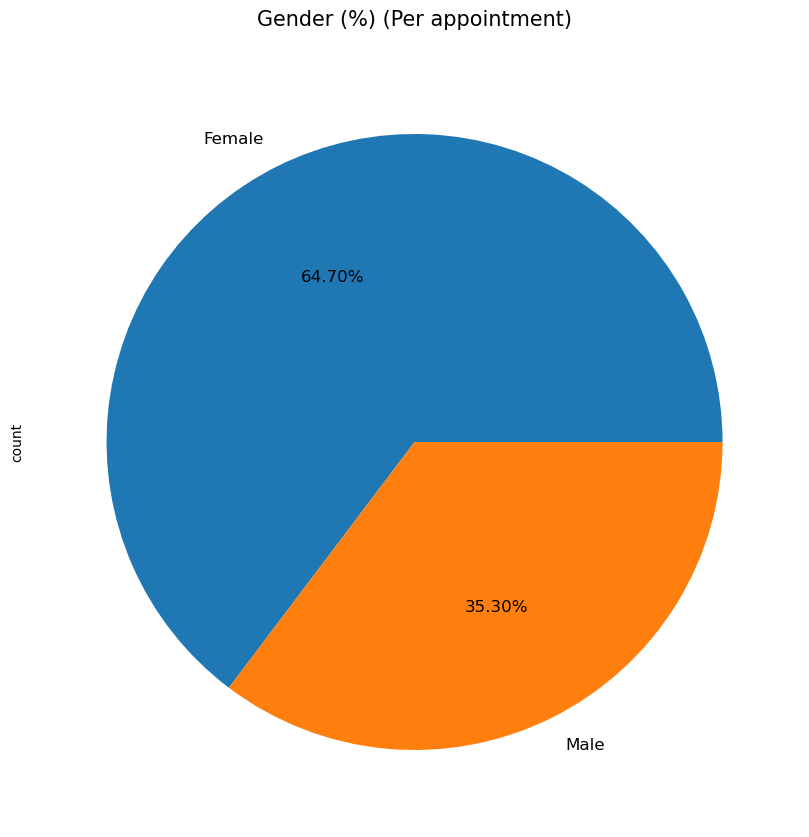

In [36]:
PropByVar(df, 'Gender')

From dashboard above ,we find that the appointment rate where patient are female is 64.70% more than appointment rate of male patient with 35.30%.

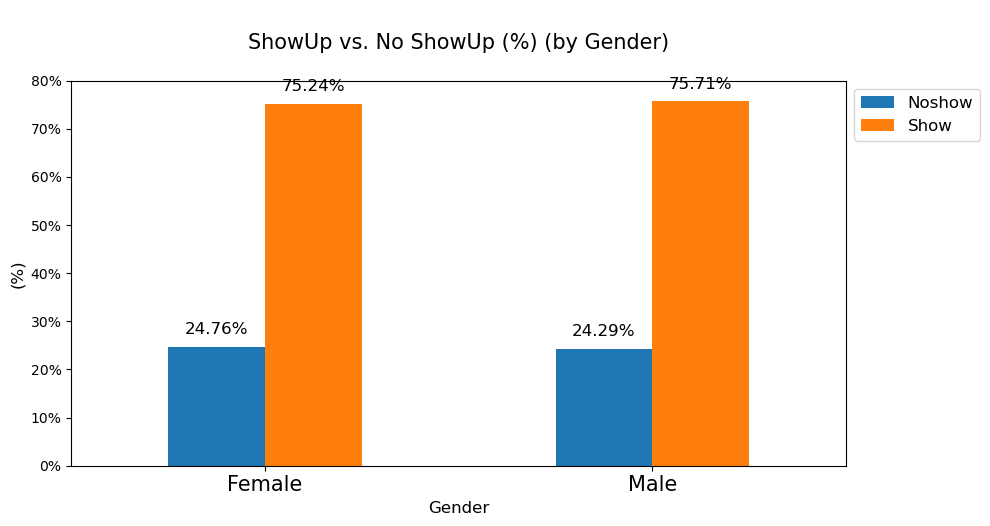

In [47]:
df_Gender = Show_No_Show_bar_plot(df,'Gender')

*Based on dashboard above :
>1.The rate of appointment where patient is female is more than patient where is male per appointment.
>2.The show-up Male patient is 75.71% greate than Female patient show-up with 75.24%.

3.Scholarship

Scholarship
NoScholarship    90.45
Scholarship       9.55
Name: count, dtype: float64

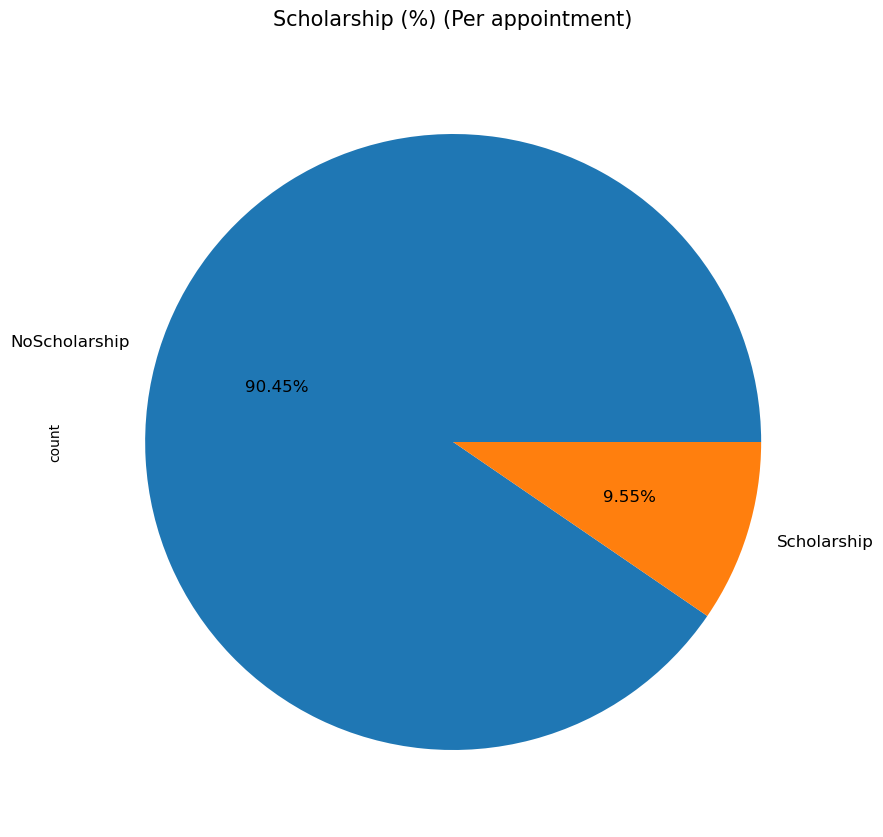

In [48]:
PropByVar(df, 'Scholarship')

From chart above ,we find that the appointment rate where No scholarship patient is 90.45% more than appointment rate of scholarship patient with 9.55%.

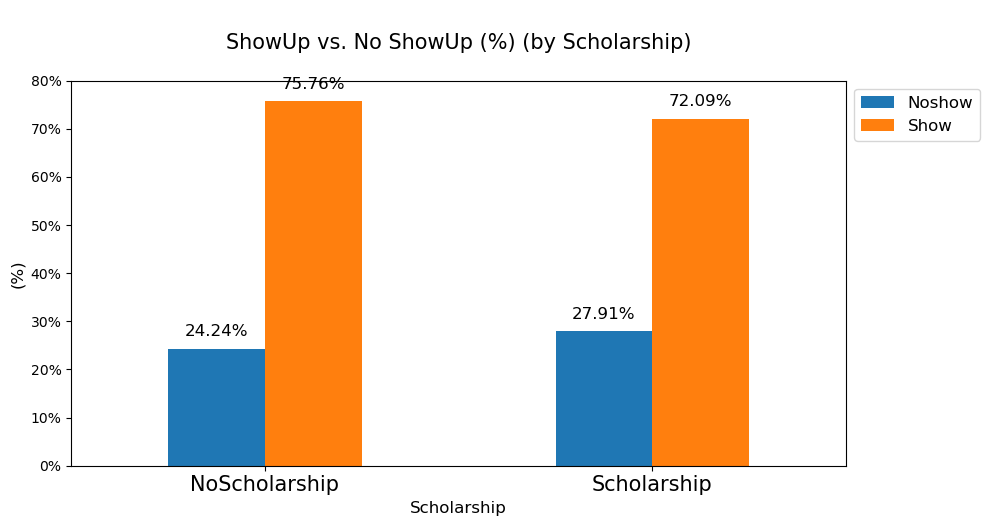

In [49]:
df_Scholarship = Show_No_Show_bar_plot(df,'Scholarship')

*Baesd on histgram above 
>1.The number of patient with noscholarship is greater than patient with scholarship (per appointment).
>2.The show-up presntage of patient with noscholarship is 75.76% more the patient with scholarship who show up with 72.09% .

4.Hypertension

Hypertension
NoHypertension    80.49
Hypertension      19.51
Name: count, dtype: float64

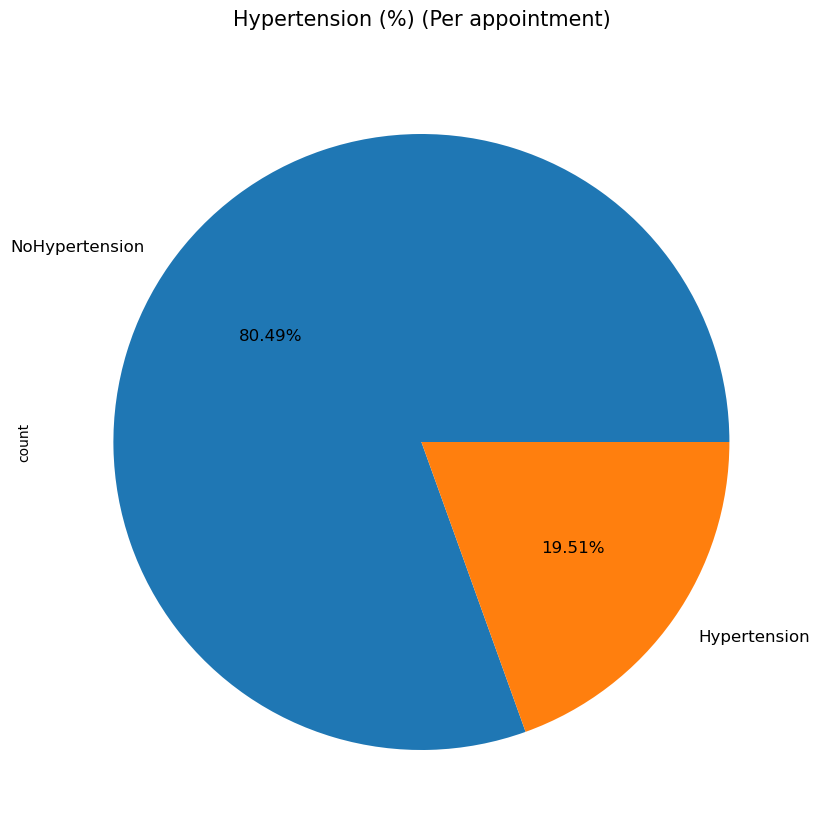

In [53]:
PropByVar(df, 'Hypertension')

From dashboard above, we find that the appointment rate where patient dont have hypertension are 80.49% more than appointment rate of hypertension patient with 19.51%.

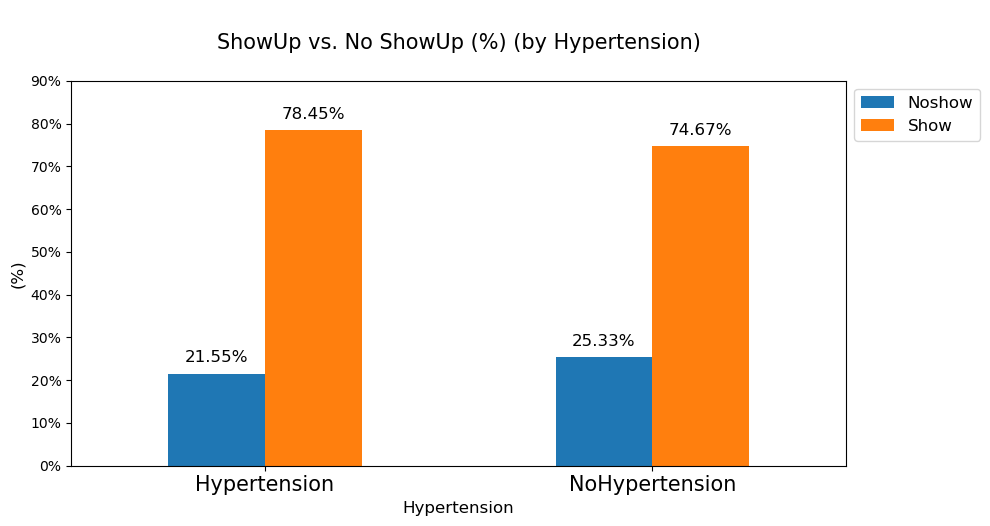

In [54]:
df_Hypertension = Show_No_Show_bar_plot(df,'Hypertension')

Based on the initial analysis above, we found that:
>1.The rate of appointments where patients don't have hypertension is the largest with 80.49%
>2.The Show-up rate of patients who have hypertension is the highest with 78.45%, where the show-up rate of patients who dont'have hypertension is 74.67%

5.Diabetes

Diabetes
NoDiabetes     92.9
YesDiabetes     7.1
Name: count, dtype: float64

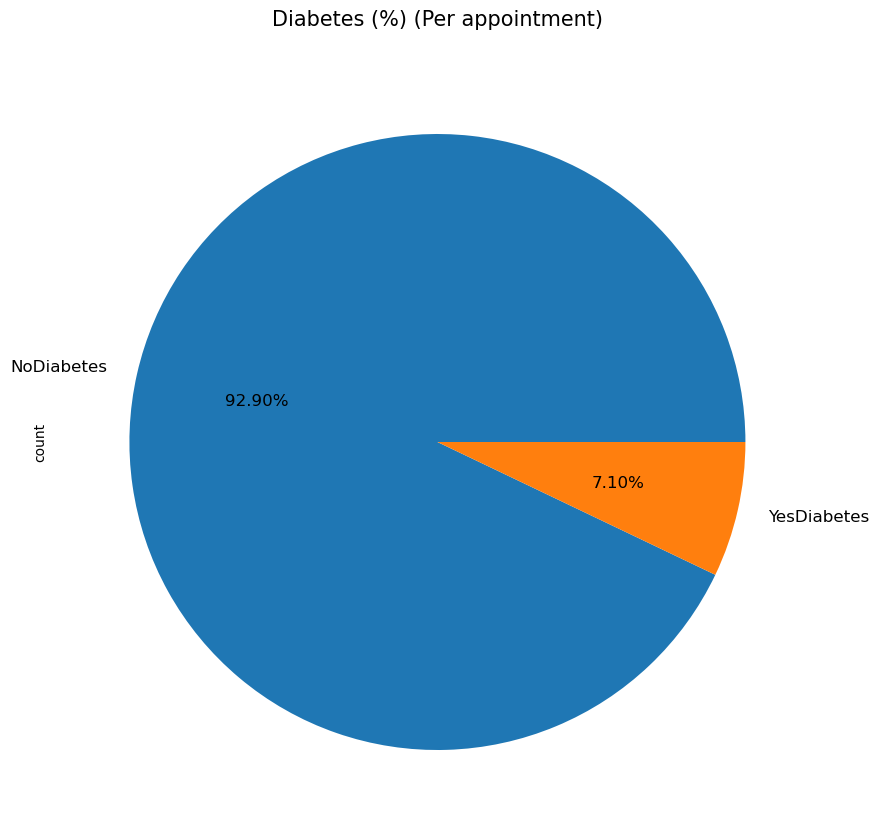

In [106]:
PropByVar(df, 'Diabetes')

From dashboard above, we find that the appointment rate where patient dont have Diabetes are 92.90% more than appointment rate of Diabetes patient with 7.10%.

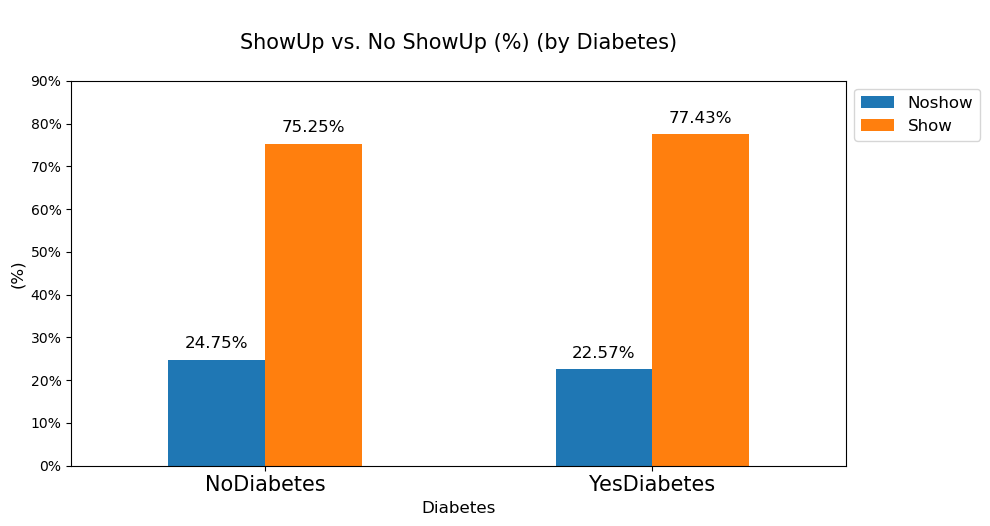

In [59]:
df_Diaberes= Show_No_Show_bar_plot(df,'Diabetes')

Based on the initial analysis above, we found that:
>1.The rate of appointments where patients don't have Diabetes is the largest with 92.90%
>2.The Show-up rate of patients who have Diabetes is the highest with 77.43%, where the show-up rate of patients who dont'have Diabetes is 75.25%

6.Alcoholism	

Alcoholism
NoAlcoholism    97.5
Alcoholism       2.5
Name: count, dtype: float64

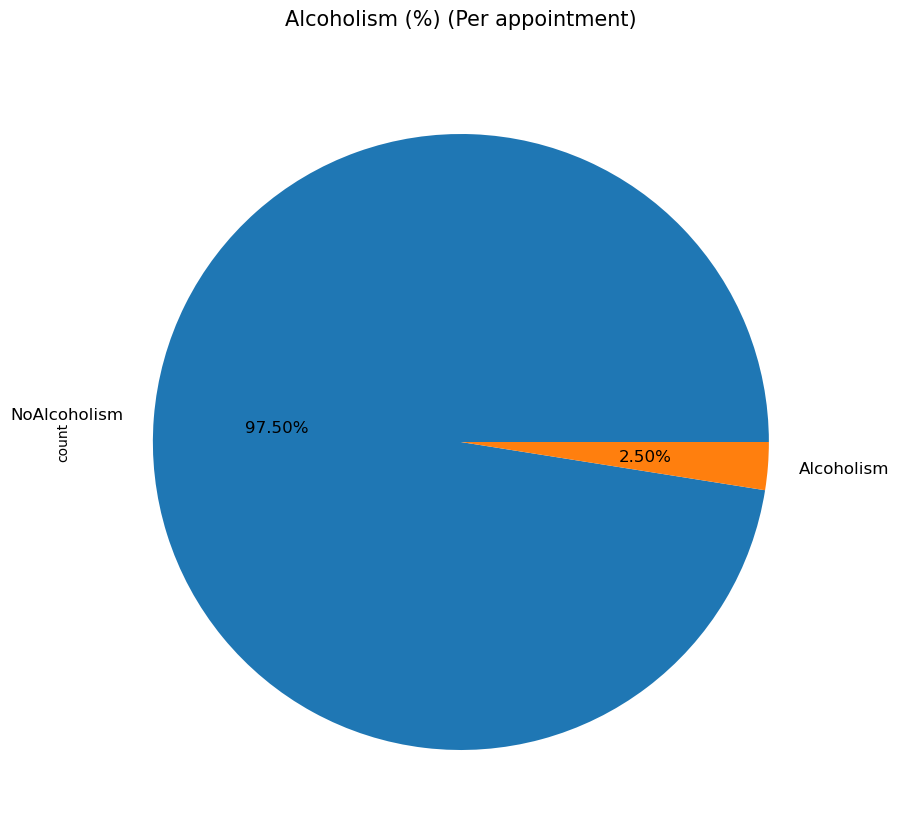

In [60]:
PropByVar(df, 'Alcoholism')

From dashboard above, we find that the appointment rate where patient dont drank alcohlism are 97.50% more than appointment rate of alcholism patient with 2.50%.

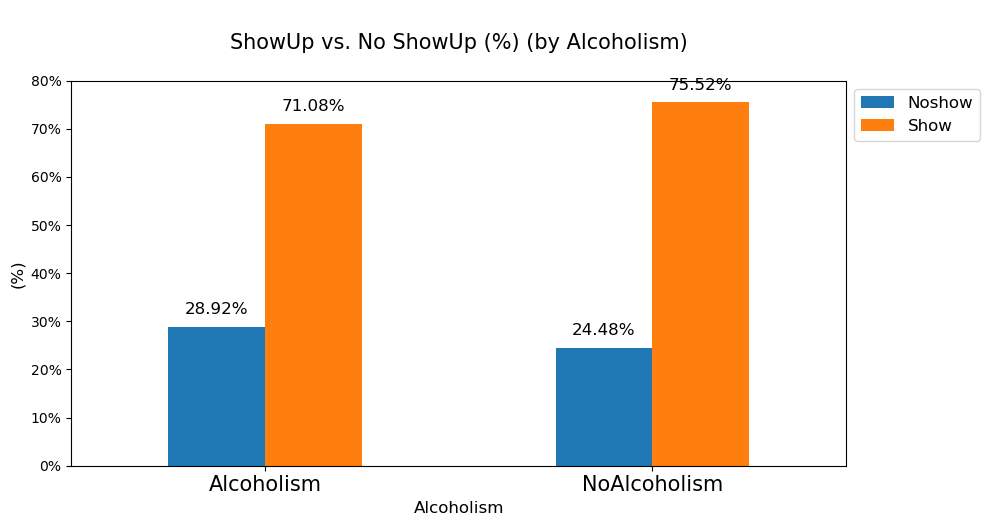

In [61]:
df_Alcoholism= Show_No_Show_bar_plot(df,'Alcoholism')

Based on the initial analysis above, we found that:
>1.The rate of appointments where patients don't have alcohlism is the largest with 97.50%
>2.The Show-up rate of patients who dont have alcoholism are the highest with 75.52%, where the show-up rate of patients who have alcoholism is 71.08%

7.Handicap	

Handicap
NoHandicap     98.18
Handicap        1.64
Handicap L2     0.16
Handicap L3     0.01
Handicap L4     0.00
Name: count, dtype: float64

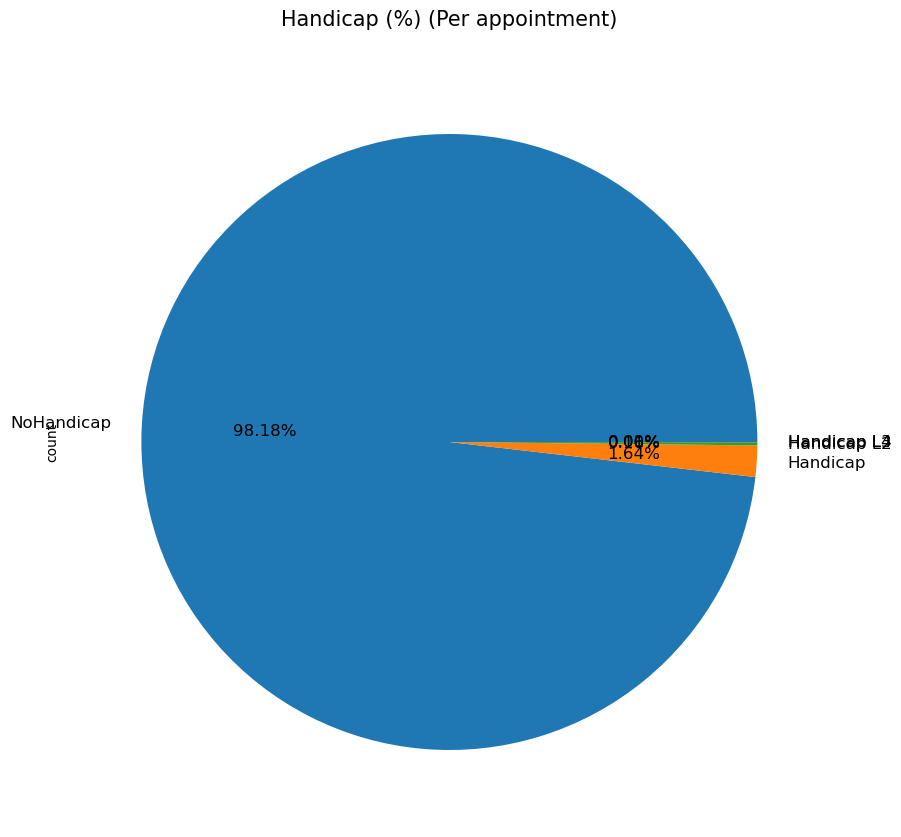

In [72]:
PropByVar(df, 'Handicap')

From dashboard above, we find that the appointment rate where patient with no handicap are 98.18% more than appointment rate of handicap L1 patient with 1.64%.

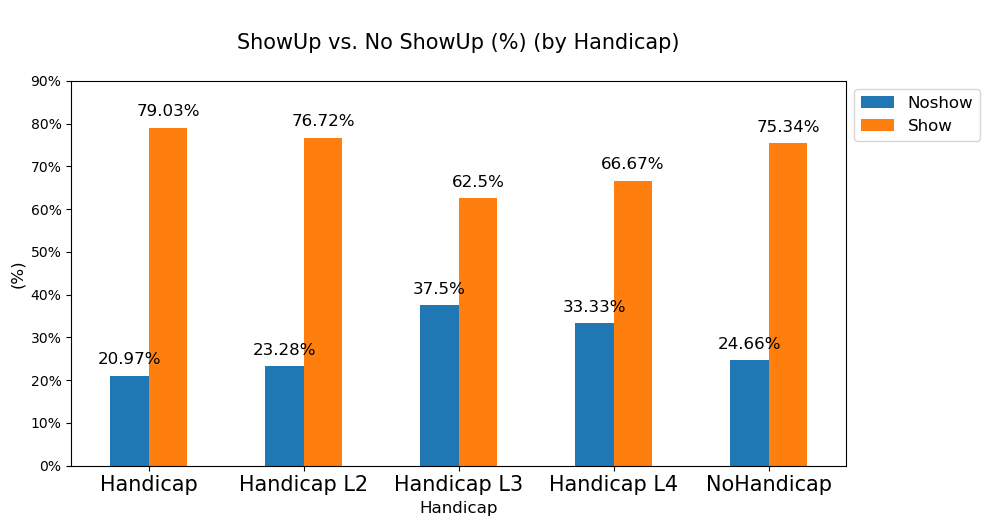

In [71]:
df_Handicap= Show_No_Show_bar_plot(df,'Handicap')

Based on the initial analysis above, we found that:
>1.The rate of appointments where patients don't have handicap is the largest with 98.18%
>2.The Show-up rate of patients who  have handicap L1  are the highest with 79.03%, where the show-up rate of patients who dont have handicap is 75.34%

6.SMS_received

SMS_received
no SMS_received    66.44
SMS_received       33.56
Name: count, dtype: float64

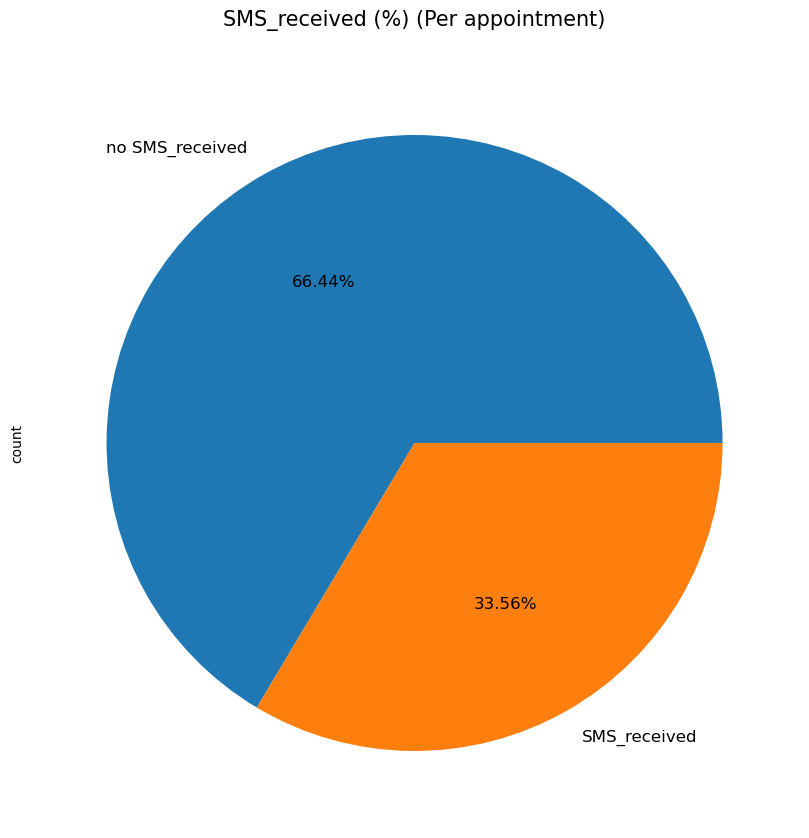

In [73]:
PropByVar(df, 'SMS_received')

From dashboard above, we find that the appointment rate who dont recieve sms massege are 66.44% more than appointment rate of  patient how received sms massege with 33.56% (per appointment).

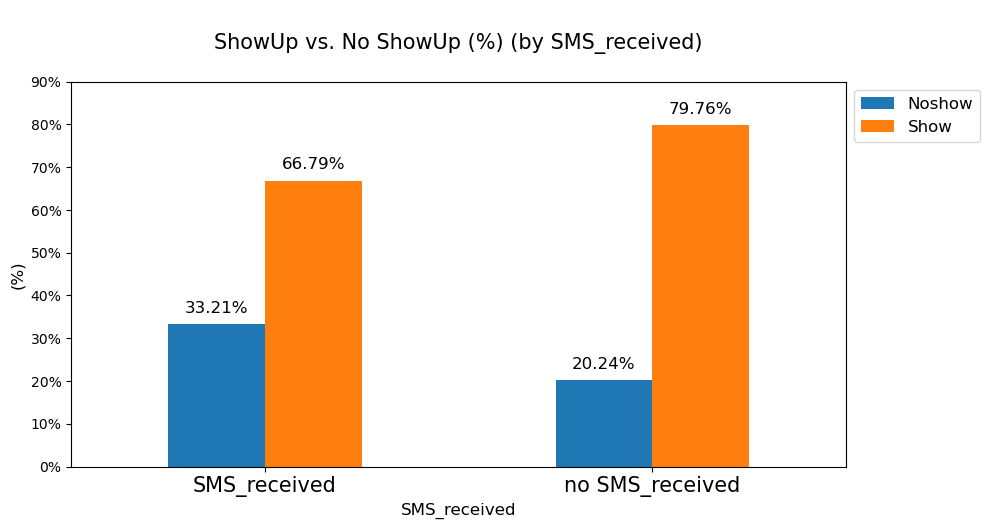

In [74]:
df_SMS_received= Show_No_Show_bar_plot(df,'SMS_received')

Based on the initial analysis above, we found that:

>1.The rate of appointments where patients didn't receive an SMS reminder is the largest with 66.44%
>2.The Show-up rate of patients who didn't receive an SMS reminder is the highest with 79.76%, where the show-up rate of patients who received an SMS reminder is 66.79%

##### <a id='conclusions'></a>
## Conclusions

> In the end, this project does not aim to provide the necessary data to find out why patients miss their appointments because it does not include any statistical or inferential techniques that are useful in achieving the required goals.

## Limitations
1.Many of the columns are categorical, making it difficult to draw inferential conclusions like we normally would from numerical data. 

2.More datapoints would be useful for drawing conclusions from the health variables.

3.It feels like it is difficult to draw strong conclusions from any of the categories, since datapoints for no-shows are relatively uncommon compared to shows.

4.The staticstics used were descriptive, not inferential, so we only have a rough idea of how things work, as opposed to rigorous conclusions
